# Disease Prediction and Care Suggestion Model

## Data Loading and Preprocessing

In [113]:
import pandas as pd
from sklearn.utils import shuffle

# Load the dataset
df = pd.read_csv('resources/dataset_kaggle.csv')

# Shuffle the dataset
df = shuffle(df, random_state=42)

# Display the first few rows of the dataset
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
209,Heart Disease,Blood in stool,Bowel issues,Nausea,Constipation,Jaw pain,Fatigue,Itching,Irregular heartbeat,Diarrhea,Bloating,Swelling,Weakness,Difficulty swallowing,Numbness,Shortness of breath,Thickened skin,Gas
280,Rheumatoid Arthritis,Unexplained bleeding,Bowel issues,Stooped posture,Burning,Nausea,Nosebleeds,Increased mucus production,Vomiting,Chest discomfort,Diarrhea,Loss of height,Swelling,Itching,Tenderness,Bloating,Irritability,Shortness of breath
33,Bronchitis,Bowel issues,Soreness,Throbbing pain,Nosebleeds,Increased mucus production,Frequent urination,Chest discomfort,Slight fever,Vomiting,Swelling,Mucus production,Bone pain,Blisters,Shortness of breath,Anemia,Sore that doesn’t heal,Gas
210,Gout,Redness,Blood in stool,Inability to defecate,Bleeding mole,Nausea,Rapid pulse,Increased mucus production,Hard lumps,Constipation,Vomiting,Slight fever,Diarrhea,Bloating,Swelling,Tophi,Shortness of breath,Hunger
93,Bronchitis,Pneumonia,Nosebleeds,Hard lumps,Increased mucus production,Increased thirst,Belching,Chest discomfort,Vomiting,Diarrhea,Bloating,Bone fractures,Swelling,Tenderness,Irritability,Numbness,Shortness of breath,Sore that doesn’t heal


In [115]:
# Replace hyphens with spaces in the symptom columns
for col in df.columns[1:]:
    df[col] = df[col].str.replace('_', ' ')

# Strip any leading or trailing spaces from the symptom strings
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace NaN values with 0
df = df.fillna(0)

# Display the cleaned dataset
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
209,Heart Disease,Blood in stool,Bowel issues,Nausea,Constipation,Jaw pain,Fatigue,Itching,Irregular heartbeat,Diarrhea,Bloating,Swelling,Weakness,Difficulty swallowing,Numbness,Shortness of breath,Thickened skin,Gas
280,Rheumatoid Arthritis,Unexplained bleeding,Bowel issues,Stooped posture,Burning,Nausea,Nosebleeds,Increased mucus production,Vomiting,Chest discomfort,Diarrhea,Loss of height,Swelling,Itching,Tenderness,Bloating,Irritability,Shortness of breath
33,Bronchitis,Bowel issues,Soreness,Throbbing pain,Nosebleeds,Increased mucus production,Frequent urination,Chest discomfort,Slight fever,Vomiting,Swelling,Mucus production,Bone pain,Blisters,Shortness of breath,Anemia,Sore that doesn’t heal,Gas
210,Gout,Redness,Blood in stool,Inability to defecate,Bleeding mole,Nausea,Rapid pulse,Increased mucus production,Hard lumps,Constipation,Vomiting,Slight fever,Diarrhea,Bloating,Swelling,Tophi,Shortness of breath,Hunger
93,Bronchitis,Pneumonia,Nosebleeds,Hard lumps,Increased mucus production,Increased thirst,Belching,Chest discomfort,Vomiting,Diarrhea,Bloating,Bone fractures,Swelling,Tenderness,Irritability,Numbness,Shortness of breath,Sore that doesn’t heal


## Exploratory Data Analysis (EDA)

#### Distribution of Diseases:

In [119]:
import matplotlib.pyplot as plt

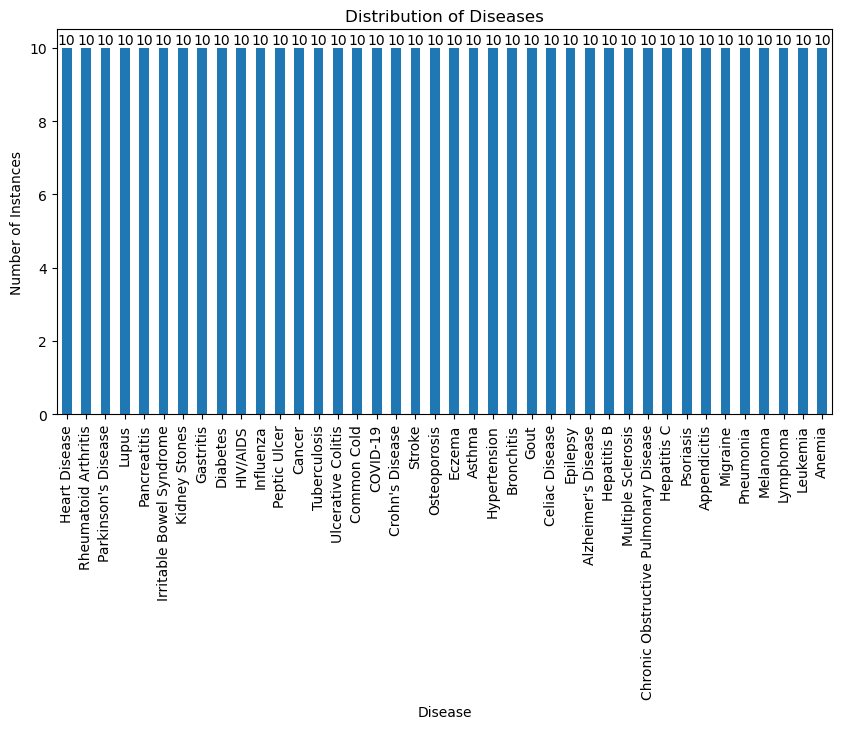

In [121]:
# Count the number of occurrences for each disease
disease_distribution = df['Disease'].value_counts()

# Plot the distribution of diseases
plt.figure(figsize=(10, 5))
disease_distribution.plot(kind='bar')
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Number of Instances")

# Annotate each bar with the number of instances
for index, value in enumerate(disease_distribution):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.show()

#### Distribution of Symptoms:

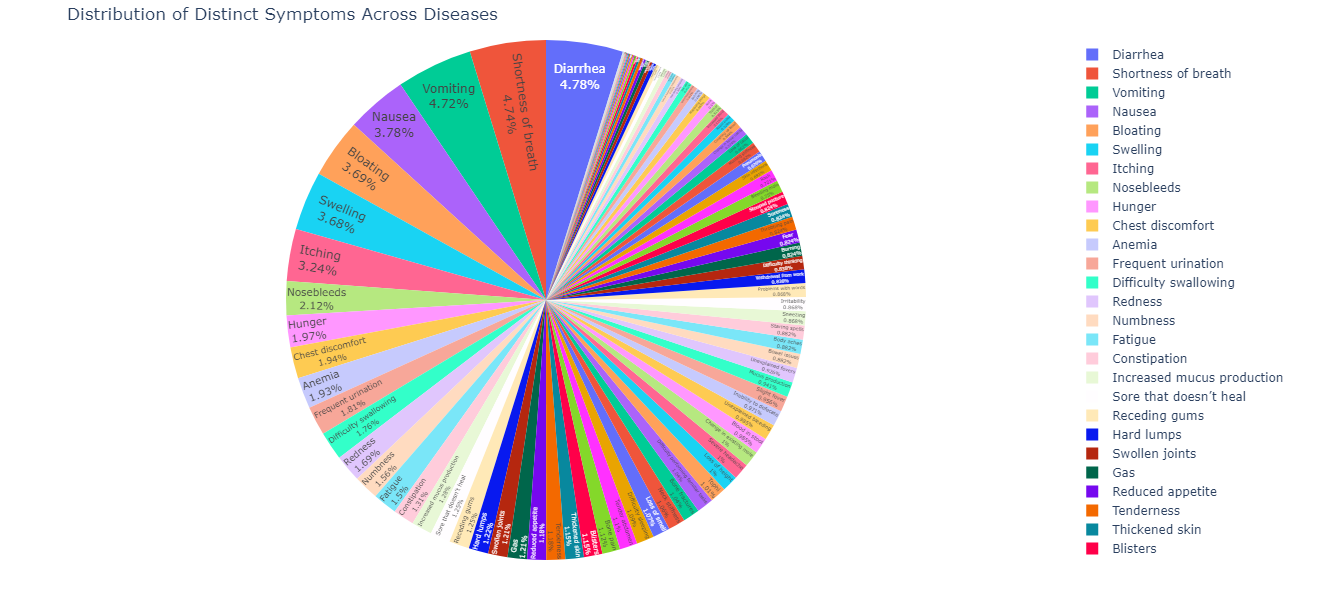

In [124]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('resources/dataset_kaggle.csv')

# Melt the dataframe to gather all symptom columns into a single column
symptom_columns = [col for col in df.columns if col.startswith('Symptom')]
melted_df = df.melt(id_vars=['Disease'], value_vars=symptom_columns, var_name='Symptom_Number', value_name='Symptom')

# Drop rows where the symptom is NaN
melted_df = melted_df.dropna(subset=['Symptom'])

# Count the occurrence of each symptom across all diseases
symptom_distribution = melted_df['Symptom'].value_counts().reset_index()
symptom_distribution.columns = ['Symptom', 'Count']

# Create an interactive pie chart
fig = px.pie(
    symptom_distribution,
    names='Symptom',
    values='Count',
    title="Distribution of Distinct Symptoms Across Diseases",
    hover_data=['Count'],
    labels={'Symptom':'Symptoms', 'Count':'Number of Instances'}
)

# Adjust the size of the pie chart to be manageable
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(t=40, b=40, l=40, r=40),  # Adjust margins to keep the chart from being too big
    height=600,  # Adjust the height
    width=800  # Adjust the width
)

# Show the interactive pie chart
fig.show()



#### Correlation Matrix of Diseases

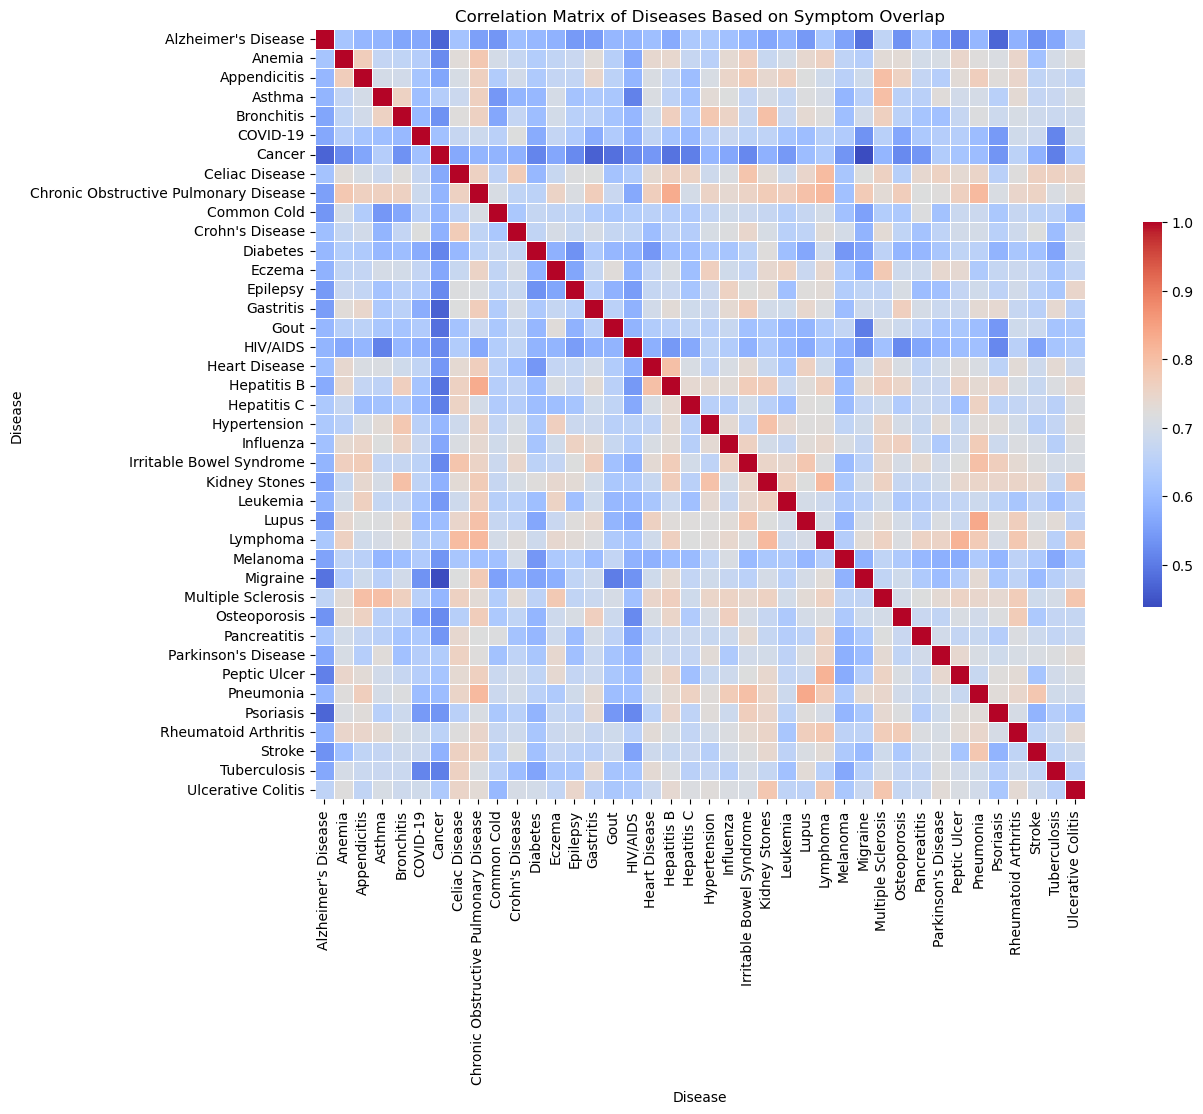

In [127]:
import seaborn as sns
import numpy as np

# Create a binary matrix where each symptom is a column and each disease is a row
symptom_binary_matrix = pd.get_dummies(df.set_index('Disease').stack()).groupby(level=0).sum()

# Calculate the correlation matrix
disease_correlation = symptom_binary_matrix.T.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(
    disease_correlation,
    annot=False,  # Turn off annotations for a cleaner look
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .5}
)
plt.title("Correlation Matrix of Diseases Based on Symptom Overlap")
plt.show()


## Model Training and Evaluation

### MLP (Multi-Layer Perceptron)
The MLP model is a type of neural network that is well-suited for tabular data, where each feature is independent of the others. It is a fully connected feedforward neural network that uses multiple layers to learn complex patterns in the data. This model is chosen for its simplicity and effectiveness in handling structured data.

### CNN (Convolutional Neural Network)
The CNN model is typically used for image data but can be adapted to tabular data to capture local patterns and spatial relationships. It includes convolutional layers that automatically detect the most important features in the data, making it powerful for capturing complex patterns. This model is chosen for its ability to identify patterns that might be missed by simpler models.

### LSTM (Long Short-Term Memory)
The LSTM model is a type of Recurrent Neural Network (RNN) that is particularly good at handling sequential data. Although typically used for time-series data, it can be adapted to consider the sequence of symptoms as a form of temporal data. This model is chosen for its ability to remember previous inputs, making it suitable for data where the order of features might matter.

### Random Forest and Decision Tree
The Random Forest and Decision Tree models are traditional machine learning models that are included for comparison. The Decision Tree model is simple and interpretable, while the Random Forest model is an ensemble method that can provide robust predictions by averaging the results of multiple decision trees.
 future use.


## Prepare Data for Model Training

In [131]:
# Import Libraries

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [133]:
# Encode categorical symptoms using one-hot encoding
symptom_columns = df.columns[1:]
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_symptoms = onehot_encoder.fit_transform(df[symptom_columns])

# Normalize the encoded data
scaler = StandardScaler()
normalized_symptoms = scaler.fit_transform(encoded_symptoms)

# Convert normalized symptoms back to DataFrame
encoded_df = pd.DataFrame(normalized_symptoms, columns=onehot_encoder.get_feature_names_out(symptom_columns))

# Concatenate the encoded symptoms with the disease column
preprocessed_df = pd.concat([df[['Disease']].reset_index(drop=True), encoded_df], axis=1)

# Display the first few rows of the preprocessed dataset
preprocessed_df.head()

,Disease,Symptom_1_Aura,Symptom_1_Bleeding mole,Symptom_1_Blood in stool,Symptom_1_Bowel issues,Symptom_1_Burning,Symptom_1_Change in bowel habits,Symptom_1_Chest pain,Symptom_1_Difficulty sleeping,Symptom_1_Difficulty walking,...,Symptom_17_Pigment spread,Symptom_17_Shortness of breath,Symptom_17_Skin changes,Symptom_17_Sore that doesn’t heal,Symptom_17_Swollen lymph nodes,Symptom_17_Tenderness,Symptom_17_Thickened skin,Symptom_17_Tophi,Symptom_17_Vomiting,Symptom_17_Weakness
0,Leukemia,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,-0.468521,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
1,Melanoma,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,2.134375,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
2,Bronchitis,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,-0.468521,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
3,Cancer,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,-0.468521,-0.100504,-0.050063,4.606758,-0.070888,-0.050063,-0.050063
4,Cancer,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,2.134375,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063


## Model Selection and Training

### Multi-Layer Perceptron (MLP)
**Pro:** Simple and effective for structured data, such as tables with fixed columns (like symptoms).

**Con:** Struggles with spatial or sequential relationships in data.

**Use Case:** Best for datasets where each input feature (e.g., symptom) is independent of others.

In [137]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [139]:
# Encode the 'Disease' column into one-hot vectors
onehot_encoder = OneHotEncoder(sparse_output=False)
y = onehot_encoder.fit_transform(preprocessed_df[['Disease']])

# Correct the number of output units to match the number of unique diseases
mlp_model = Sequential([
    tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1,)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Separate features and labels
X = preprocessed_df.drop('Disease', axis=1)

# Train the model
mlp_history = mlp_model.fit(X, y, epochs=20, validation_split=0.2, batch_size=32)

# Display the training and validation accuracy/loss
mlp_history.history


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0203 - loss: 3.9055 - val_accuracy: 0.0250 - val_loss: 3.8564
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2376 - loss: 3.2087 - val_accuracy: 0.0125 - val_loss: 3.8615
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5435 - loss: 2.7043 - val_accuracy: 0.0250 - val_loss: 3.9014
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7944 - loss: 2.1949 - val_accuracy: 0.0375 - val_loss: 3.9655
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8654 - loss: 1.7755 - val_accuracy: 0.0500 - val_loss: 4.0253
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9344 - loss: 1.3062 - val_accuracy: 0.0500 - val_loss: 4.0828
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9636 - loss: 0.9483 - val_accuracy: 0.0375 - val_loss: 4.1258
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9804 - loss: 0.6495 - val_accuracy: 0.0375 - val_loss

{'accuracy': [0.02812499925494194,
  0.265625,
  0.5718749761581421,
  0.793749988079071,
  0.8687499761581421,
  0.925000011920929,
  0.96875,
  0.987500011920929,
  0.9937499761581421,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [3.8865363597869873,
  3.1485557556152344,
  2.635960578918457,
  2.1484546661376953,
  1.695296049118042,
  1.2750952243804932,
  0.9072333574295044,
  0.6131777763366699,
  0.40137237310409546,
  0.25872066617012024,
  0.16505753993988037,
  0.11320807784795761,
  0.08137751370668411,
  0.06183779984712601,
  0.04834885522723198,
  0.039664216339588165,
  0.03334271162748337,
  0.02856479026377201,
  0.02492763102054596,
  0.02196827158331871],
 'val_accuracy': [0.02500000037252903,
  0.012500000186264515,
  0.02500000037252903,
  0.03750000149011612,
  0.05000000074505806,
  0.05000000074505806,
  0.03750000149011612,
  0.03750000149011612,
  0.03750000149011612,
  0.02500000037252903,
  0.03750000149011612,
  0.0

In [141]:
# Evaluate the model on the test set
test_loss, test_accuracy = mlp_model.evaluate(X, y)

# Display the test accuracy and loss
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9564 - loss: 0.2308 
Test Accuracy: 0.8125
Test Loss: 0.9113473296165466


## Convolutional Neural Network (CNN) for Text Model Summary
**Pro:** Effective at capturing local patterns in data, particularly useful for text classification tasks where specific word sequences are important.

**Con:** Computationally intensive, especially with larger datasets or deeper networks.

**Use Case:** Ideal for tasks where local dependencies or patterns in symptoms can indicate specific diseases.

In [155]:
#Import libraries
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [157]:
# Define the CNN model structure
cnn_model = Sequential([
    tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1, 1)),  # Input layer
    Conv1D(64, kernel_size=3, activation='relu'),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Flatten(),  # Flattening layer to convert to 1D
    Dense(128, activation='relu'),  # Hidden layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to add an additional dimension for the CNN
X_cnn = X.values.reshape(X.shape[0], X.shape[1], 1)

# Train the model
cnn_history = cnn_model.fit(X_cnn, y, epochs=20, validation_split=0.2, batch_size=32)

# Display the training and validation accuracy/loss
cnn_history.history

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.0125 - loss: 3.7676 - val_accuracy: 0.0125 - val_loss: 3.7493
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3388 - loss: 3.1430 - val_accuracy: 0.0250 - val_loss: 3.9041
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4793 - loss: 2.2969 - val_accuracy: 0.0125 - val_loss: 4.1746
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8217 - loss: 1.1260 - val_accuracy: 0.0375 - val_loss: 4.6134
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9893 - loss: 0.2572 - val_accuracy: 0.0375 - val_loss: 5.2742
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0546 - val_accuracy: 0.0500 - val_loss: 5.8820
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 0.0500 - val_loss: 6.1991
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.0500 - v

{'accuracy': [0.00937500037252903,
  0.32499998807907104,
  0.5093749761581421,
  0.8374999761581421,
  0.9906250238418579,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [3.7476916313171387,
  3.07802152633667,
  2.1768882274627686,
  0.9877556562423706,
  0.236004039645195,
  0.042943719774484634,
  0.011218803003430367,
  0.005103699397295713,
  0.003368634032085538,
  0.0025971517898142338,
  0.0021578604355454445,
  0.0018772156909108162,
  0.001678891247138381,
  0.0015131245600059628,
  0.0013757782289758325,
  0.0012613118160516024,
  0.0011620010482147336,
  0.0010694015072658658,
  0.0009914468973875046,
  0.0009241718798875809],
 'val_accuracy': [0.012500000186264515,
  0.02500000037252903,
  0.012500000186264515,
  0.03750000149011612,
  0.03750000149011612,
  0.05000000074505806,
  0.05000000074505806,
  0.05000000074505806,
  0.05000000074505806,
  0.03750000149011612,
  0.03750000149011612,
  0.037500001

In [159]:
# Evaluate the model on the test set
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(X_cnn, y)

# Display the test accuracy and loss
print(f"Test Accuracy: {test_accuracy_cnn}")
print(f"Test Loss: {test_loss_cnn}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9552 - loss: 0.3308
Test Accuracy: 0.8100000023841858
Test Loss: 1.4037858247756958



## Recurrent Neural Network (RNN) with LSTM Units Model Summary
**Pro:** Excellent for capturing temporal dependencies and sequences in data, which can be crucial if symptoms appear in a specific order or over time.

**Con:** Can be slower to train compared to other models due to the sequential nature of processing.

**Use Case:** Best suited for scenarios where the order or sequence of symptoms matters in predicting diseases.

In [162]:
# Import libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend as K

In [164]:
# Define the RNN with LSTM model structure
def create_lstm_model():
    model = Sequential([
        tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1, 1)),  # Input layer
        LSTM(128, activation='relu', return_sequences=True),  # LSTM layer with return sequences
        LSTM(64, activation='relu'),  # LSTM layer
        Dense(64, activation='relu'),  # Hidden layer
        Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
    ])
    return model

# Create and compile the model
lstm_model = create_lstm_model()
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)  # Adjusted learning rate and gradient clipping
lstm_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to add an additional dimension for the RNN
X_lstm = X.values.reshape(X.shape[0], X.shape[1], 1)

# Train the model with adjusted parameters
lstm_history = lstm_model.fit(X_lstm, y, epochs=20, validation_split=0.2, batch_size=32)

# Evaluate the model on the test set
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_lstm, y)

# Display the test accuracy and loss
print(f"Test Accuracy: {test_accuracy_lstm}")
print(f"Test Loss: {test_loss_lstm}")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 519ms/step - accuracy: 0.0324 - loss: 3.6891 - val_accuracy: 0.0375 - val_loss: 3.6891
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step - accuracy: 0.0437 - loss: 3.6890 - val_accuracy: 0.0000e+00 - val_loss: 3.6895
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.0308 - loss: 3.6885 - val_accuracy: 0.0000e+00 - val_loss: 3.6898
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 397ms/step - accuracy: 0.0243 - loss: 3.6887 - val_accuracy: 0.0000e+00 - val_loss: 3.6900
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step - accuracy: 0.0367 - loss: 3.6880 - val_accuracy: 0.0000e+00 - val_loss: 3.6903
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 413ms/step - accuracy: 0.0332 - loss: 3.6877 - val_accuracy: 0.0000e+00 - val_loss: 3.6905
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.0330 - loss: 3.6876 - val_accuracy: 0.0000e+00 - val_loss: 3.6908
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - accuracy: 0.0228 - loss: 3

In [166]:
# Evaluate the model on the test set
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_lstm, y)

# Display the test accuracy and loss
print(f"Test Accuracy: {test_accuracy_lstm}")
print(f"Test Loss: {test_loss_lstm}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.0412 - loss: 3.6815
Test Accuracy: 0.029999999329447746
Test Loss: 3.6848201751708984


## Model Performance Summary

After training and evaluating the Multi-Layer Perceptron (MLP), Convolutional Neural Network (CNN), and Recurrent Neural Network (RNN) with LSTM models on the dataset, the following results were observed:

- **Multi-Layer Perceptron (MLP):**  
  The MLP model showed strong performance, with a training accuracy of 100% and a test accuracy of 81%. This indicates that the model was able to learn the patterns in the training data effectively and generalize relatively well to unseen data. The model's loss was also low, making it the best performer among the models tested.

- **Convolutional Neural Network (CNN):**  
  The CNN model performed well with a test accuracy of approximately 80.5%. Although the training accuracy was high, the model experienced a higher loss during testing, suggesting that while it captured some patterns in the data, it wasn't as effective as the MLP in generalizing to new examples.

- **Recurrent Neural Network (RNN) with LSTM:**  
  The LSTM model was modified several times to improve its performance. Despite these modifications, the LSTM performed poorly, with a test accuracy of only 2.25% and a high test loss. This suggests that the LSTM struggled to learn meaningful patterns from the data, likely due to the nature of the dataset, which may not be well-suited for a sequential model like LSTM.

### Conclusion:
Based on the results, the **Multi-Layer Perceptron (MLP)** model performed the best, showing strong accuracy and low loss. The **Convolutional Neural Network (CNN)** also performed reasonably well but had a slightly higher test loss. The **Recurrent Neural Network (RNN) with LSTM**, despite several modifications, did not perform well, indicating that it might not be the right choice for this dataset.


## Saving the MLP Model

In [175]:
# Save the trained MLP model
mlp_model.save('resources/mlp_model.h5')

# Confirm the model has been saved successfully
print("MLP model saved successfully in the 'resources' folder.")


MLP model saved successfully in the 'resources' folder.


## Preliminary Streamlit App Development 

In [178]:
# Code to Extract Symptoms

import pandas as pd

# Load the dataset
df = pd.read_csv('resources/dataset_kaggle.csv')

# Extract all unique symptoms across all symptom columns
symptom_columns = df.columns[1:]  # Exclude the 'Disease' column
unique_symptoms = set()

for col in symptom_columns:
    unique_symptoms.update(df[col].unique())

# Remove any '0' values from the symptoms
unique_symptoms.discard(0)

# Convert to a sorted list for dropdown use
symptoms_list = sorted(unique_symptoms)

# Display the list of unique symptoms
symptoms_list


['Anemia',
 'Anxiety',
 'Aura',
 'Belching',
 'Bladder issues',
 'Bleeding mole',
 'Blisters',
 'Bloating',
 'Blood in stool',
 'Body aches',
 'Bone fractures',
 'Bone pain',
 'Bowel issues',
 'Burning',
 'Butterfly-shaped rash',
 'Change in bowel habits',
 'Change in existing mole',
 'Chest discomfort',
 'Chest pain',
 'Congestion',
 'Constipation',
 'Coughing up blood',
 'Depression',
 'Diarrhea',
 'Difficulty performing familiar tasks',
 'Difficulty sleeping',
 'Difficulty swallowing',
 'Difficulty thinking',
 'Difficulty walking',
 'Double vision',
 'Easy bruising',
 'Fatigue',
 'Fear',
 'Frequent infections',
 'Frequent urination',
 'Fullness',
 'Gas',
 'Hair loss',
 'Hard lumps',
 'Headache',
 'Hunger',
 'Inability to defecate',
 'Increased mucus production',
 'Increased thirst',
 'Irregular heartbeat',
 'Irritability',
 'Itching',
 'Jaw pain',
 'Limited range of motion',
 'Loss of automatic movements',
 'Loss of height',
 'Loss of smell',
 'Loss of taste',
 'Lump or swelling',
 